In [1]:
pip install -U scikit-fuzzy

In [17]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

# Generate universe variables
# * Quality and service on subjective ranges [0, 10]
# * Tip has a range of [0, 25] in units of percentage points
x_temp = np.arange(0, 111, 1)
x_cover = np.arange(0, 101, 1)
x_speed = np.arange(0, 101, 1)

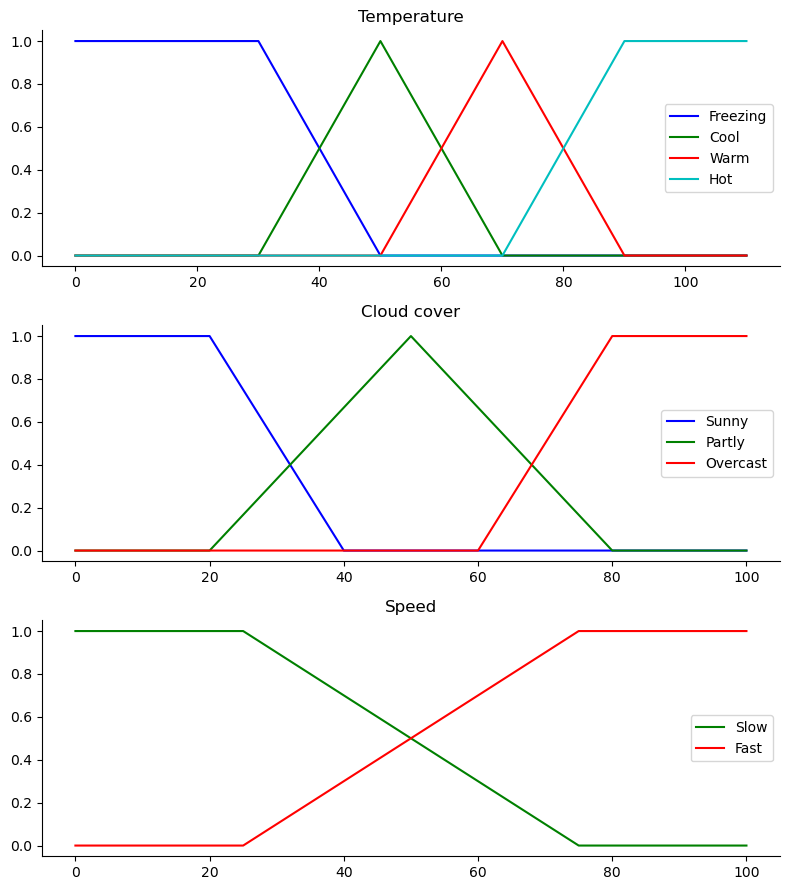

In [22]:
# Generate fuzzy membership functions
temp_freezing = fuzz.trapmf(x_temp, [0, 0, 30, 50])  # Triangular membership function
temp_cool = fuzz.trimf(x_temp, [30, 50, 70])
temp_warm = fuzz.trimf(x_temp, [50, 70, 90])
temp_hot = fuzz.trapmf(x_temp, [70, 90, 110, 110])
cover_sunny = fuzz.trapmf(x_cover, [0, 0, 20, 40])
cover_partly = fuzz.trimf(x_cover, [20, 50, 80])
cover_overcast = fuzz.trapmf(x_cover, [60, 80, 100, 100])
speed_slow = fuzz.trapmf(x_speed, [0, 0, 25, 75]);
speed_fast = fuzz.trapmf(x_speed, [25, 75, 100, 100]);

# Visualize these universes and membership functions
fig, (ax0, ax1, ax2) = plt.subplots(nrows=3, figsize=(8, 9))
      
ax0.plot(x_temp, temp_freezing, 'b', linewidth=1.5, label='Freezing')
ax0.plot(x_temp, temp_cool, 'g', linewidth=1.5, label='Cool')
ax0.plot(x_temp, temp_warm, 'r', linewidth=1.5, label='Warm')
ax0.plot(x_temp, temp_hot, 'c', linewidth=1.5, label='Hot')
ax0.set_title('Temperature')
ax0.legend()

ax1.plot(x_cover, cover_sunny, 'b', linewidth=1.5, label='Sunny')
ax1.plot(x_cover, cover_partly, 'g', linewidth=1.5, label='Partly')
ax1.plot(x_cover, cover_overcast, 'r', linewidth=1.5, label='Overcast')
ax1.set_title('Cloud cover')
ax1.legend()

ax2.plot(x_speed, speed_slow, 'g', linewidth=1.5, label='Slow')
ax2.plot(x_speed, speed_fast, 'r', linewidth=1.5, label='Fast')
ax2.set_title('Speed')
ax2.legend()

# Turn off top/right axes
for ax in (ax0, ax1, ax2):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

    plt.tight_layout()

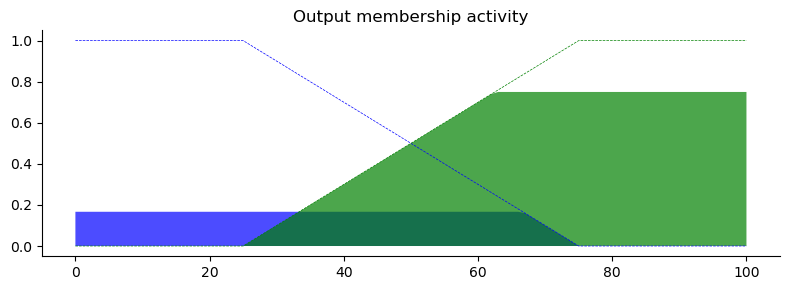

In [28]:
'''Now, to make these triangles useful, we deﬁne the fuzzy relationship between input and output variables. For the
purposes of our example, consider three simple rules:
1. If the food is bad OR the service is poor, then the tip will be low
2. If the service is acceptable, then the tip will be medium
3. If the food is great OR the service is amazing, then the tip will be high.
Rule application
What would the tip be in the following circumstance:
• Food quality was 6.5
• Service was 9.8 '''
# We need the activation of our fuzzy membership functions at these values.
# The exact values 6.5 and 9.8 do not exist on our universes...
# This is what fuzz.interp_membership exists for!
temp_freezing_y = fuzz.interp_membership(x_temp, temp_freezing, 65) # Given an input, Derive all fuzziness valus by finding out: 
                                                             # Fuzziness of input as low quality (maybe 70%)
temp_cool_y = fuzz.interp_membership(x_temp, temp_cool, 65) # Fuzziness of input as med quality (maybe 29%)
temp_warm_y = fuzz.interp_membership(x_temp, temp_warm, 65) # Fuzziness of input as high quality (maybe 1%)
temp_hot_y = fuzz.interp_membership(x_temp, temp_hot, 65) 

cover_sunny_y = fuzz.interp_membership(x_cover, cover_sunny, 25)
cover_partly_y = fuzz.interp_membership(x_cover, cover_partly, 25)
cover_overcast_y = fuzz.interp_membership(x_cover, cover_overcast, 25)

# Now we take our rules and apply them. Rule 1 concerns bad food OR service.
# The OR operator means we take the maximum of these two.
rule1 = np.fmin(temp_warm_y, cover_sunny_y) #Fuzzy max rule (OR)

# Now we apply this by clipping the top off the corresponding output
# membership function with `np.fmin`
#fmin - Fuzzy min rule (AND)
speed_fast_activation = np.fmin(rule1, speed_fast) # removed entirely to 0

rule2 = np.fmin(temp_cool_y, cover_partly_y) #Fuzzy max rule (OR)
speed_slow_activation = np.fmin(rule2, speed_slow) # removed entirely to 0

speed0 = np.zeros_like(x_speed)

# Visualize this
fig, ax0 = plt.subplots(figsize=(8, 3))

ax0.fill_between(x_speed, speed0, speed_slow_activation, facecolor='b', alpha=0.7)
ax0.plot(x_speed, speed_slow, 'b', linewidth=0.5, linestyle='--', )
ax0.fill_between(x_speed, speed0, speed_fast_activation, facecolor='g', alpha=0.7)
ax0.plot(x_speed, speed_fast, 'g', linewidth=0.5, linestyle='--')
ax0.set_title('Output membership activity')

# Turn off top/right axes
for ax in (ax0,):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()

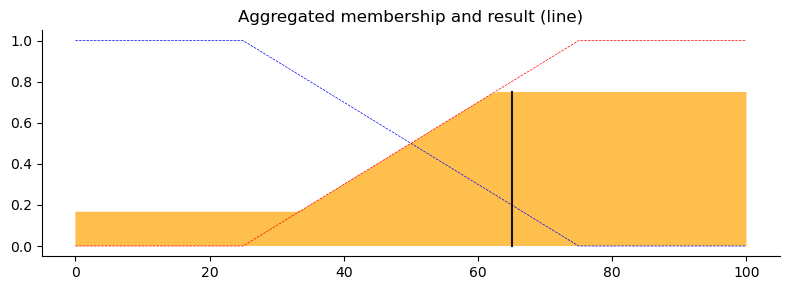

In [30]:
# Deffuzzification, Aggregate all three output membership functions together
aggregated = np.fmax(speed_fast_activation,speed_slow_activation)
# Calculate defuzzified result
speed = fuzz.defuzz(x_speed, aggregated, 'centroid')
speed_defuzzed = fuzz.interp_membership(x_speed, aggregated, speed) # for plot

# Visualize this
fig, ax0 = plt.subplots(figsize=(8, 3))

ax0.plot(x_speed, speed_slow, 'b', linewidth=0.5, linestyle='--', )
ax0.plot(x_speed, speed_fast, 'r', linewidth=0.5, linestyle='--')
ax0.fill_between(x_speed, speed0, aggregated, facecolor='Orange', alpha=0.7)
ax0.plot([speed, speed], [0, speed_defuzzed], 'k', linewidth=1.5, alpha=0.9)
ax0.set_title('Aggregated membership and result (line)')

# Turn off top/right axes
for ax in (ax0,):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

    plt.tight_layout()